# Customer Analysis: Prediction & Evaluation

## Familiarise yourself with Data Descriptions and the Goal:

In [98]:
# Importing the libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler

**data definitions for handy reference:**

- Unnamed: Index
- customer: Customer ID
- state: US State
- customer_lifetime_value: CLV is the client economic value for a company during all their relationship
- response: Response to marketing calls (customer engagement)
- coverage: Customer coverage type
- education: Customer education level
- effective_to_date: Effective to date
- employmentstatus: Customer employment status
- gender: Customer gender
- income: Customer income
- location_code: Customer living zone
- marital_status: Customer marital status
- monthly_premium_auto: Monthly premium
- months_since_last_claim: Last customer claim
- months_since_policy_inception: Policy Inception
- number_of_open_complaints: Open claims
- number_of_policies: Number policies
- policy_type: Policy type
- policy: Policy
- renew_offer_type: Renew
- sales_channel: Sales channel (customer-company first contact)
- total_claim_amount: Claims amount
- vehicle_class: Vehicle class
- vehicle_size: Vehicle size
- vehicle_type: Vehicle type

## Read the .csv file into python:

In [51]:
cd LAB - Customer Analysis Round 2

[WinError 2] The system cannot find the file specified: 'LAB - Customer Analysis Round 2'
C:\Users\lluis\OneDrive\Escritorio\Ironhack\DAILY\week 1\Dia 3\LAB - Customer Analysis Round 2


In [52]:
mca=pd.read_csv('marketing_customer_analysis.csv')

In [53]:
mca.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Cleaning/Wrangling/EDA

### Change headers names. Deal with NaN values, replace with appropriate method:

In [54]:
# We'll standarise the column names to lowercase:
cols = []

for column in range(len(mca.columns)):
    cols.append(mca.columns[column].lower())

mca.columns = cols

In [55]:
# Replacing spaces to '_':
mca.columns = mca.columns.str.replace(' ', '_')

In [56]:
mca.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [57]:
# Dropping index and 'vehicle_type' columns:
mca = mca.drop(columns = ['unnamed:_0'])
mca = mca.drop(columns = ['vehicle_type'])

In [58]:
# First of all, we use the function 'dropna()' and then restart the index:

mca = mca.dropna(how = 'all')
mca.reset_index(drop=True, inplace=True)

# Column 'state' --> we'll replace NaN with 'Unknown'
mca['state'] = mca['state'].fillna("Unknown")

# Now, we'll deal with the numerical columns with NaN:
mslc = mca['months_since_last_claim'].median()
mca['months_since_last_claim'] = mca['months_since_last_claim'].fillna(mslc)

nooc = mca['number_of_open_complaints'].median()
mca['number_of_open_complaints'] = mca['number_of_open_complaints'].fillna(nooc)

# The rest of categorical columns:
mca['response'] = mca['response'].fillna("Unknown")
mca['vehicle_class'] = mca['vehicle_class'].fillna("Unknown")
mca['vehicle_size'] = mca['vehicle_size'].fillna("Unknown")

In [59]:
# After that, we check the % of NaN has each column:

nulls_df = pd.DataFrame(round(mca.isna().sum() / len(mca), 4) * 100)
nulls_df = nulls_df.rename(columns = {'index':'header', 0: 'prop_nulls'})
nulls_df      # output: no NULL values

,prop_nulls
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


### Split categorical Features and Numerical Features:

In [60]:
# Before to execute the split, we select the objective:
y = mca['total_claim_amount']
X = mca.drop(['total_claim_amount'], axis = 1)

# Dropping 'customer' column:
X = X.drop(['customer', 'effective_to_date'], axis = 1)

# Separating the numerical and categorical features:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

### Explore visually both sets of features, to identify next steps:

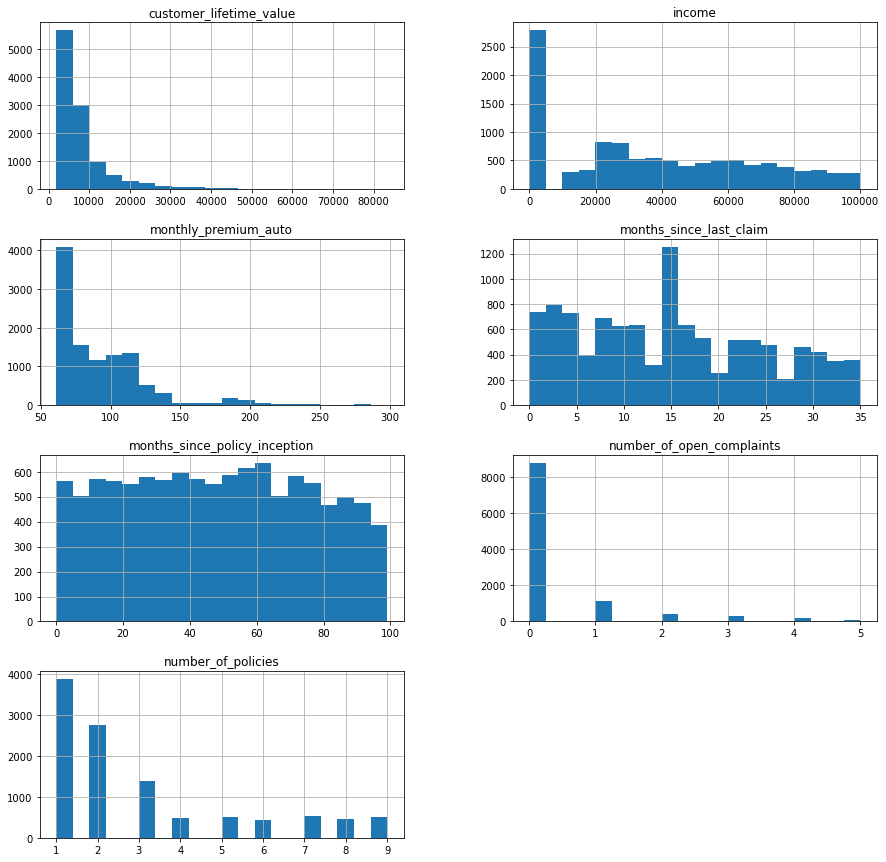

In [61]:
# Numericals:
X_num.hist(figsize = (15, 15), bins = 20, layout = (4, 2));

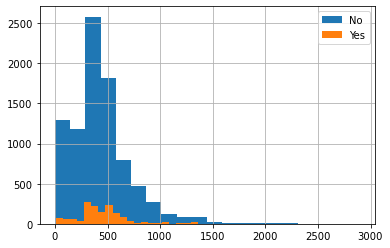

In [62]:
# Categoricals:

# For example, a distribution plot between the 'response' (Yes / No) and the 'total_claim_amount':
query = mca.query('response == ["Yes", "No"]')
mca.groupby(query['response'])['total_claim_amount'].hist(bins=20, legend = True);

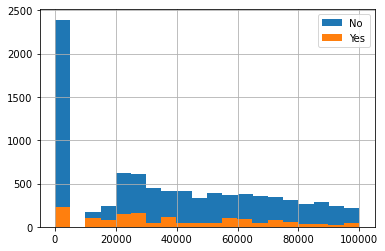

In [63]:
mca.groupby(query['response'])['income'].hist(bins=20, legend = True);

### Look at potential multicollinearity using a correlation matrix or other approach:

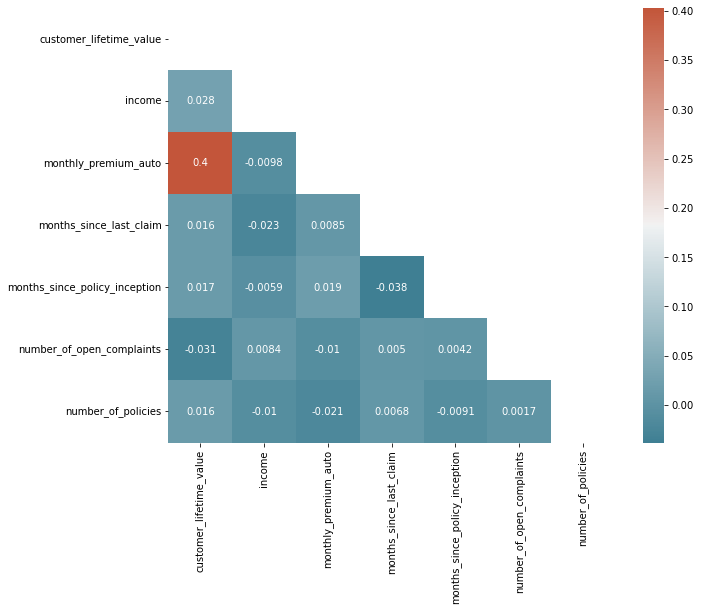

In [64]:
corre_matrix = X_num.corr()     # by default, it will display PEARSONS correlation

mask = np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corre_matrix, mask = mask, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True));

## Pre-Processing Data

### Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

<AxesSubplot:>

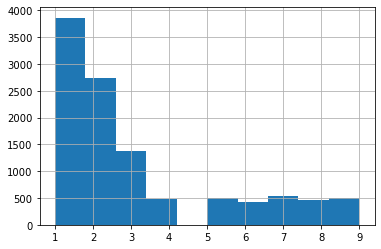

In [65]:
# 1) Preprocessing 'number_of_policies' column:
mca['number_of_policies'].hist()

In [66]:
iqr = np.percentile(mca['number_of_policies'],75) - np.percentile(mca['number_of_policies'], 25)

upper_limit = np.percentile(mca['number_of_policies'], 75) + 1.5 * iqr
lower_limit = np.percentile(mca['number_of_policies'], 25) - 1.5 * iqr

# example only --> we will use a nes df variable:
data_exc_out = mca[(mca['number_of_policies'] > lower_limit) & (mca['number_of_policies'] < upper_limit)]

<AxesSubplot:>

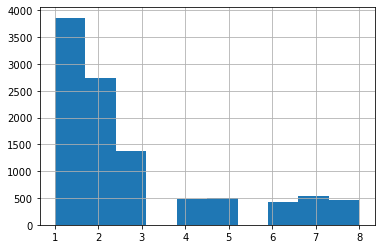

In [67]:
data_exc_out['number_of_policies'].hist()

<AxesSubplot:>

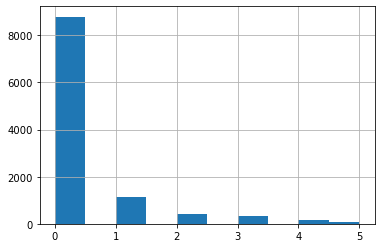

In [68]:
# 2) Preprocessing 'number_of_open_complaints' column:
mca['number_of_open_complaints'].hist()

In [69]:
iqr2 = np.percentile(mca['number_of_open_complaints'],75) - np.percentile(mca['number_of_open_complaints'], 25)

upper_limit2 = np.percentile(mca['number_of_open_complaints'], 75) + 1.5 * iqr
lower_limit2 = np.percentile(mca['number_of_open_complaints'], 25) - 1.5 * iqr

# example only --> we will use a nes df variable:
data_exc_out2 = mca[(mca['number_of_open_complaints'] > lower_limit2) & (mca['number_of_open_complaints'] < upper_limit2)]

<AxesSubplot:>

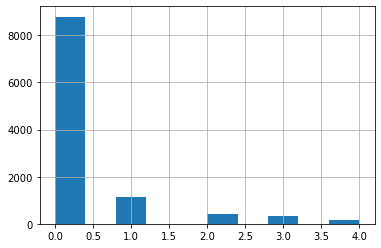

In [70]:
data_exc_out2['number_of_open_complaints'].hist()

**Summary preprocessing**: the columns chosen to execute it are not appropiate because their pattern is more categorical rather than numerical (the visualisation of the charts do not seem continuous). Therefore, we will try to execute with the column "customer_lifetime_value" and "monthly_premium_auto".

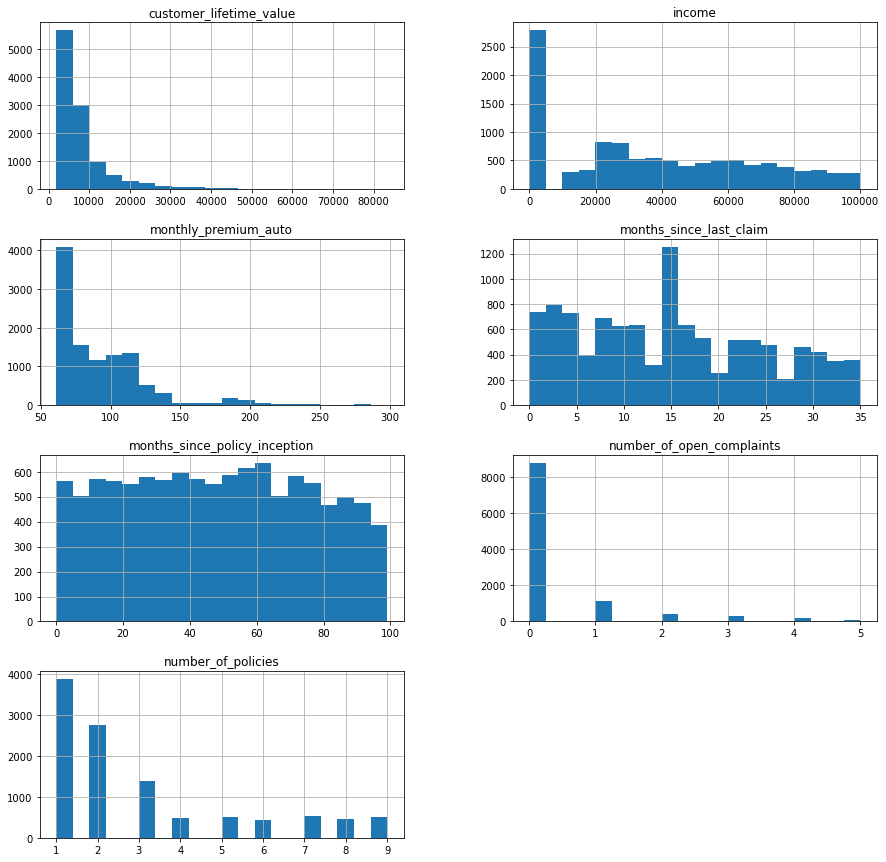

In [71]:
# General visualisation of our numerical columns with histograms:

X_num.hist(figsize = (15, 15), bins = 20, layout = (4, 2));

<AxesSubplot:>

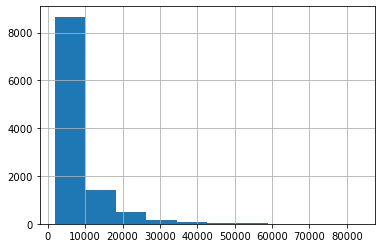

In [72]:
# 2) Preprocessing 'customer_lifetime_value' column:
mca['customer_lifetime_value'].hist()

<AxesSubplot:>

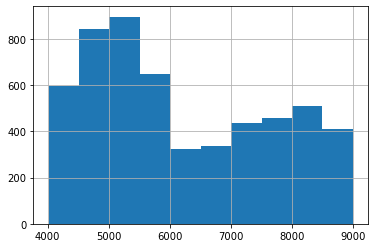

In [73]:
iqr3 = np.percentile(mca['customer_lifetime_value'],75) - np.percentile(mca['customer_lifetime_value'], 25)

upper_limit3 = np.percentile(mca['customer_lifetime_value'], 75) + 1.5 * iqr
lower_limit3 = np.percentile(mca['customer_lifetime_value'], 25) - 1.5 * iqr

data_exc_out3 = mca[(mca['customer_lifetime_value'] > lower_limit3) & (mca['customer_lifetime_value'] < upper_limit3)]

data_exc_out3['customer_lifetime_value'].hist()   # it looks like a more normal distribution.

<AxesSubplot:>

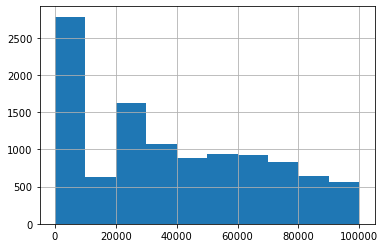

In [74]:
# 2) Preprocessing 'income' column:
mca['income'].hist()

<AxesSubplot:>

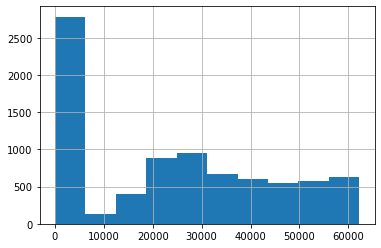

In [75]:
iqr4 = np.percentile(mca['income'],75) - np.percentile(mca['income'], 25)

upper_limit4 = np.percentile(mca['income'], 75) + 1.5 * iqr
lower_limit4 = np.percentile(mca['income'], 25) - 1.5 * iqr

data_exc_out4 = mca[(mca['income'] > lower_limit4) & (mca['income'] < upper_limit4)]

data_exc_out4['income'].hist()       # no changes appeared (same pattern -> no normal distribution)

### Encoding Categorical Data fields using OHE:

In [76]:
encoder = OneHotEncoder(handle_unknown = 'error', drop = 'first').fit(X_cat)
X_encoded = encoder.transform(X_cat).toarray()

# Getting dummies:
X_dummies = pd.get_dummies(X_cat, drop_first = True)

### Bring categorical and numerical columns back together using pd.concat:

In [77]:
X_final = pd.concat((X_num, X_dummies), axis = 1)

In [78]:
X_final.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown
0,4809.216960,48029,61,7.0,52,0.0,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2228.525238,0,64,3.0,26,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14947.917300,22139,100,34.0,31,0.0,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,22332.439460,49078,97,10.0,3,0.0,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,9025.067525,23675,117,14.0,31,0.0,7,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Define X and y, the y value you are seeking to predict is claim amount:

In [79]:
X = X_final

In [80]:
X.shape

(10910, 54)

In [81]:
y.shape

(10910,)

### Splitting into train set and test dataset using random state, eg 80%:20%:

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 40)

## Modeling

### Apply linear regression model from sklearn.linear_model:

In [83]:
lm = linear_model.LinearRegression()     # configuring the model
model = lm.fit(X_train, y_train)

### Fit over your train data and predict against X test:

In [84]:
preds = lm.predict(X_test)

In [85]:
preds

array([482.56059604, 943.19288248, 385.05015397, ..., 597.16035792,
       505.64500273, 146.43581053])

## Model Validation

### You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE:

- **R-squared (R2)**: corresponds to the squared correlation between the observed outcome values and the predicted values by the model (the higher the R2, the better the model).

- **Root Mean Squared Error (RMSE)**: measures the average error performed by the model in predicting the outcome for an observation. It is the average squared difference between the observed actual outcome values and the values predicted by the model (the lower the RMSE, the better the model).

- **Mean Absolute Error (MAE)**: like the RMSE, the MAE measures the prediction error. It is the average absolute difference between observed and predicted outcomes (MAE is less sensitive to outliers compared to RMSE).

- **Residual Standard Error** (**RSE** o model sigma): is a variant of the RMSE adjusted for the number of predictors in the model (the lower the RSE, the better the model). 

In [86]:
# R-squared (R2):

round(r2_score(y_test, preds), 2)

0.77

In [87]:
# Mean Squared Error (MSE):

round(mean_squared_error(y_test, preds), 2)

19590.73

In [88]:
# Root of the Mean of the Square of Errors (RMSE):

root_mean_square_errors = sqrt(mean_squared_error(y_test, preds))
round(root_mean_square_errors, 2)

139.97

In [89]:
# Mean Absolute Error (MAE):

mean_abs_error = mae(y_test, preds)
round(mean_abs_error, 2)

94.81

## Reporting:

### Present results inside your notebook with appropriate annotation describing the accuracy of the model and business insight gained:

Looking at the results we extracted with the model applied, we get an accuracy of 77% with a mean of 19.590 dolars per claim and between 94 and almost 140 dolars of margin of error.

# Comparative of the effect of different scalers on data outliers (Day 6):

In [90]:
test1 = mca

In [101]:
# Before to execute the split, we select the objective:
y = test1['total_claim_amount']
X = test1.drop(['total_claim_amount'], axis = 1)

# Dropping 'customer' column:
X = X.drop(['customer'], axis = 1)

# Separating the numerical and categorical features:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [105]:
test1['effective_to_date'] = pd.to_datetime(test1['effective_to_date'], errors = 'coerce')

In [107]:
# 1) MinMaxScaler -> date

In [110]:
scaler = MinMaxScaler()
scaled = scaler.fit(test1['effective_to_date'])
scaled_date = scaled.transform(test1['effective_to_date'])

# Because we get an error that it is expecting a 2D array (DataFrame) and we have a 1D array:


ValueError: Expected 2D array, got 1D array instead:
array=[1.2979872e+18 1.2953088e+18 1.2972960e+18 ... 1.2969504e+18 1.2975552e+18
 1.2944448e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
# 2) Standard Scaler -> x_num

In [111]:
object = StandardScaler()
scale = object.fit_transform(X_num)
scale

array([[-0.46610505,  0.34563485, -0.93481904, ...,  0.13987654,
        -0.4066559 ,  2.50945468],
       [-0.84094593, -1.23646244, -0.84771343, ..., -0.79070911,
        -0.4066559 , -0.82492205],
       [ 1.00652314, -0.50719362,  0.19755381, ..., -0.61175033,
        -0.4066559 , -0.40812496],
       ...,
       [ 2.30582467,  0.07578661,  3.13010912, ...,  0.53358586,
        -0.4066559 , -0.40812496],
       [ 0.5742732 ,  0.87815031,  1.88159547, ..., -0.75491735,
         4.08725734,  1.25906341],
       [-0.16859268, -1.23646244,  0.22658901, ..., -1.685503  ,
        -0.4066559 ,  0.00867213]])

In [112]:
scale.shape

(10910, 7)